In [6]:
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.dpi'] = 110

In [7]:
df = pd.read_csv("data_diff.csv",encoding = "utf8")

C:\Users\letym\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


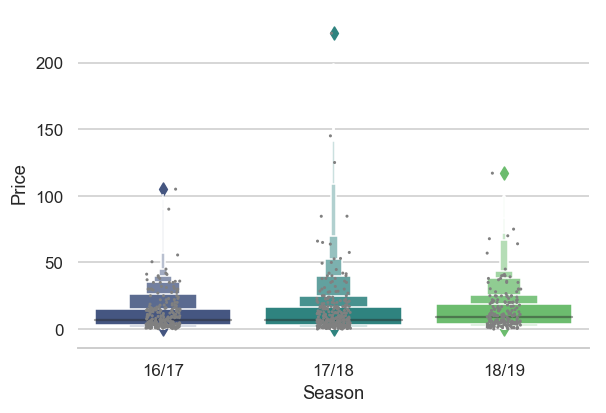

In [11]:
# sfondo bianco, colori Set2 e bordini bainchi
#sb.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sb.set_style("whitegrid")
#sb.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sb.boxenplot(x='season_x', y='price_tm', data=df, palette="viridis")
ax = sb.stripplot(x='season_x', y='price_tm', data=df, size=2, jitter=True, color="gray")
ax.set(xlabel='Season', ylabel='Price')
df['lp']=np.nan
df['lp'] = np.log(df.price_tm)
sb.despine(left=True)

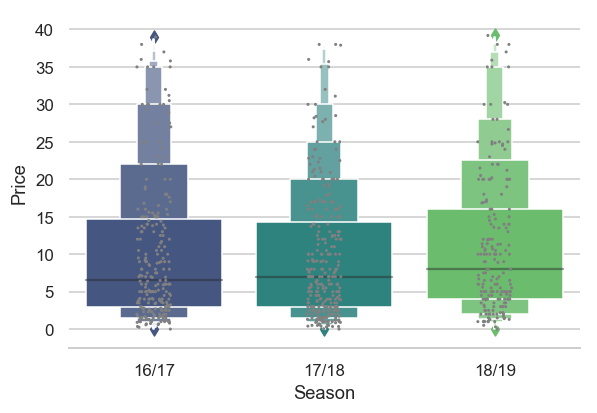

In [10]:
# We can observe a slight increase in the minimum price
sb.set_style("whitegrid")
df4 = df[df.price_tm < 40]
sb.boxenplot(x='season_x', y='price_tm', data=df4, palette="viridis", scale = 'exponential')
ax = sb.stripplot(x='season_x', y='price_tm', data=df4, size=2, jitter=True, color="gray")
ax.set(xlabel='Season', ylabel='Price')
sb.despine(left=True)

From this graph we can see that the difference we told before seems not so significant. We can do a test on the means to confirm what we have told and then we can do the same test only for players sold for more than 20 million. In this last graph they seems to be similar maybe because most of the players were paid less than 20 million and the distribution we see is very affected by this fact.

In [50]:
tab_ruolo = pd.crosstab(index=df["role"], columns="Freq_assoluta")
tab_ruolo['Freq_assoluta']

role
Attacker      228
Defender      274
Midfielder    271
Name: Freq_assoluta, dtype: int64

(0, 50)

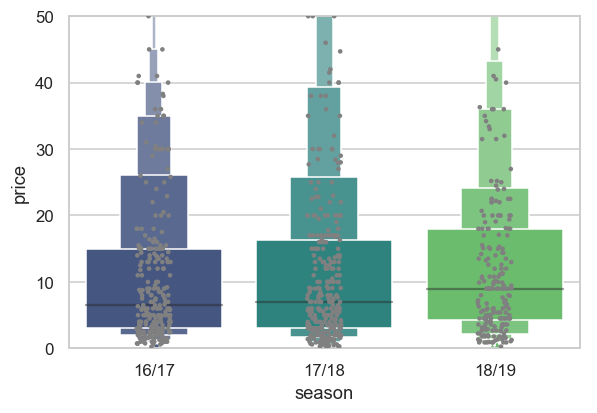

In [51]:
sb.set(style='whitegrid')
sb.despine(left=True)
sb.boxenplot(x='season', y='price', data=df, palette="viridis")
ax = sb.stripplot(x='season', y='price', data=df, size=3, jitter=True,color='gray')
ax.set_ylim([0, 50])

In [52]:
df.shape[0]

773

(0, 40)

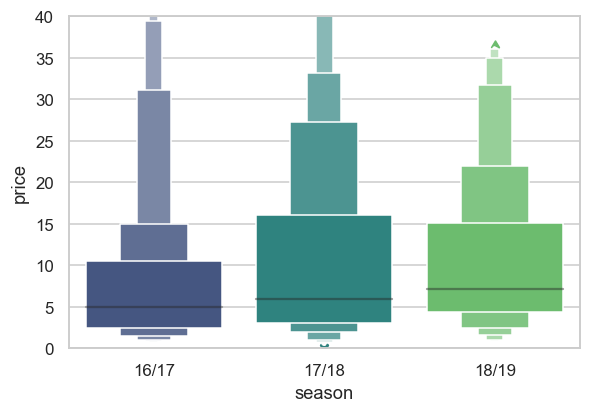

In [53]:
dfD = df[df.role =='Defender']
ax = sb.boxenplot(x= "season", y="price", data=dfD, palette='viridis')
#ax = sb.swarmplot(x="season", y="price", data=dfGK)
ax.set_ylim([0, 40])

(0, 40)

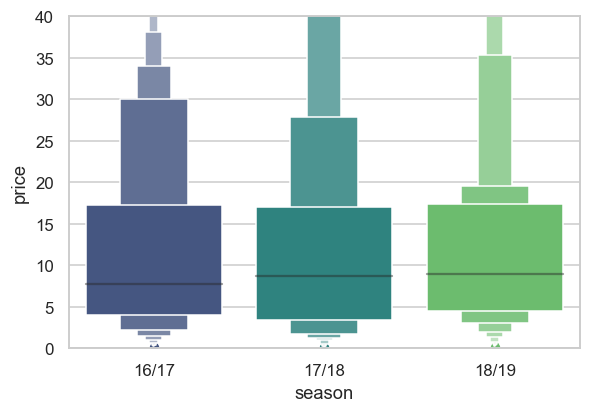

In [54]:
dfAT = df[df.role =='Attacker']
ax = sb.boxenplot(x= "season", y="price", data=dfAT, palette='viridis')
ax.set_ylim([0, 40])

(0, 40)

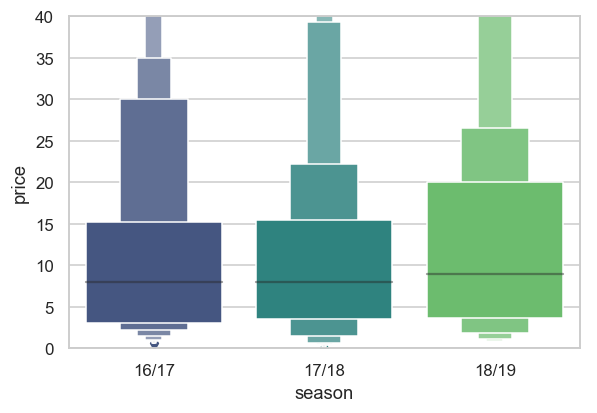

In [55]:
dfMF = df[df.role =='Midfielder']
ax = sb.boxenplot(x= "season", y="price", data=dfMF, palette='viridis')
ax.set_ylim([0, 40])

C:\Users\letym\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


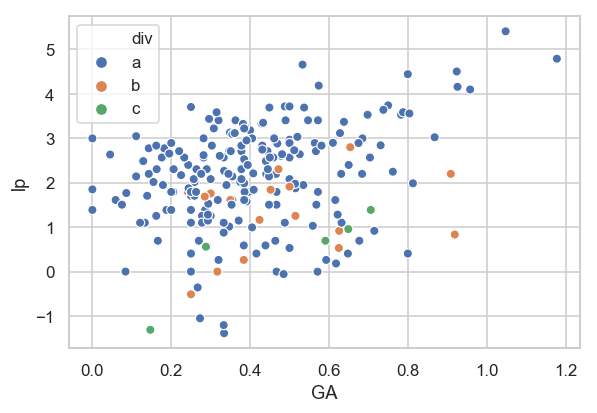

In [56]:
dfAT['GA'] = df.goal_per_match1Year+df.assist_per_match1Year
ax = sb.scatterplot(x='GA', y="lp", hue="div", data=dfAT)

In [57]:
# sancho era under 18!!!!
dfAT[dfAT.lp < -1]

,Unnamed: 0,date,season,height,weight,team_from,team_to,price,wintersummer,role,...,total_goals_opponents1Year,total_goals1Year,more1t,liq,div,dA,dB,dC,lp,GA
225,225,31/01/2017,16/17,182,73,Crotone,Genoa,0.25,w,Attacker,...,51,41,0,53,a,1,0,0,-1.386294,0.334
451,451,02/07/2017,17/18,182,75,Ternana,Lazio,0.30,s,Attacker,...,55,44,0,273,a,1,0,0,-1.203973,0.333
550,550,01/01/2018,17/18,173,66,Mainz 05,Las Palmas,0.35,w,Attacker,...,76,69,0,35,a,1,0,0,-1.049822,0.273
681,681,28/06/2018,18/19,172,60,Trapani,Frosinone,0.27,s,Attacker,...,47,69,0,181,c,0,0,1,-1.309333,0.147


In [58]:
df.to_csv('data_graph.csv', header=True, sep=',')